import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sklearn
import matplotlib
import IPython
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import sparse
import mglearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from mglearn.datasets import make_forge
from mglearn.plot_helpers import discrete_scatter

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sklearn
import matplotlib
import IPython
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import sparse
import mglearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from mglearn.datasets import make_forge
from mglearn.plot_helpers import discrete_scatter

/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


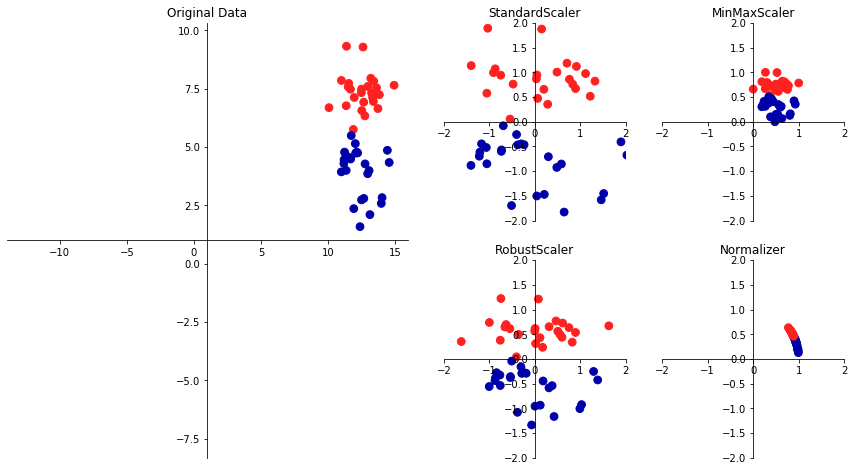

In [3]:
mglearn.plots.plot_scaling()

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [14]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [20]:
print(cancer['data'])
print(cancer['data'].shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [21]:
print(cancer['target'])
print(cancer['target'].shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [22]:
print(cancer['target_names'])
print(cancer['target_names'].shape)

['malignant' 'benign']
(2,)


In [23]:
print(cancer['feature_names'])
print(cancer['feature_names'].shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
X_train_scaled = scaler.transform(X_train)
print("Transformed shape: {}".format(X_train_scaled.shape))
print("Pre feature minimum before scaling: \n {}".format(X_train.min(axis=0)))
print("Pre feature Maximum before scaling: \n {}".format(X_train.max(axis=0)))
print("Pre feature minimum after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("Pre feature Maximum after scaling: \n {}".format(X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)
Pre feature minimum before scaling: 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Pre feature Maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Pre feature minimum after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Pre feature Maximum after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [39]:
X_test_scaled = scaler.transform(X_test)
print("Transformed shape: {}".format(X_train_scaled.shape))
print("Pre feature minimum after scaling: \n {}".format(X_test_scaled.min(axis=0)))
print("Pre feature Maximum after scaling: \n {}".format(X_test_scaled.max(axis=0)))

Transformed shape: (426, 30)
Pre feature minimum after scaling: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
Pre feature Maximum after scaling: 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [41]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

In [47]:
print(X.shape)
print(X.min(axis=0))
print(X.max(axis=0))

(50, 2)
[ -6.82908995 -11.17068396]
[13.78731721  6.12600179]


In [49]:
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

In [50]:
print(X_train.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))

(45, 2)
[ -6.82908995 -11.17068396]
[13.78731721  6.12600179]


In [51]:
print(X_test.shape)
print(X_test.min(axis=0))
print(X_test.max(axis=0))

(5, 2)
[ 4.02967146 -9.39007458]
[12.83840263  2.07069557]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

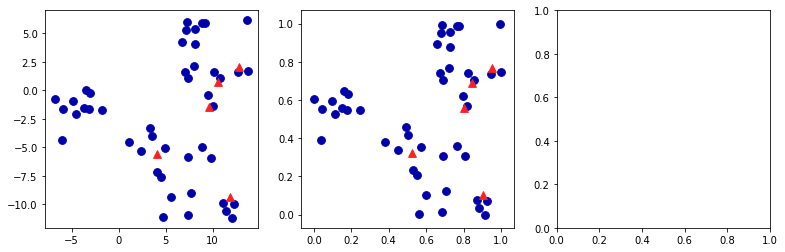

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training data set ", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2(1), marker='^', label="Training data set ", s=60)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training data set ", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2(1), marker='^', label="Training data set ", s=60)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

In [84]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test accracy before scaling {:.2f}'.format(svm.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print('Test accracy after scaling {:.2f}'.format(svm.score(X_test_scaled, y_test)))



Test accracy before scaling 0.63
Test accracy after scaling 0.97


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [100]:
#### This process performs bad because it is confused between regression and classification problem
#### It is very important to understand if the problem is regression problem or classification problem

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
print(diabetes.keys())
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)
svm = SVC(C=0.001, gamma=0.0001)
svm.fit(X_train, y_train)
print('Test accracy before scaling {:.2f}'.format(svm.score(X_test, y_test)))

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print('Test accracy after scaling {:.2f}'.format(svm.score(X_test_scaled, y_test)))

ridge1 = Ridge().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

print("Regression Before Scaling Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Regression Before Scaling Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Ridge Before Scaling Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("Ridge Before Scaling Testing set score: {:.2f}".format(ridge1.score(X_test, y_test)))


ridge1 = Ridge().fit(X_train_scaled, y_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

print("Regression After Scaling Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Regression After Scaling Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("Ridge After Scaling Training set score: {:.2f}".format(ridge1.score(X_train_scaled, y_train)))
print("Ridge After Scaling Testing set score: {:.2f}".format(ridge1.score(X_test_scaled, y_test)))

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
Test accracy before scaling 0.02
Test accracy after scaling 0.02
Regression Before Scaling Training set score: 0.56
Regression Before Scaling Test set score: 0.36
Ridge Before Scaling Training set score: 0.46
Ridge Before Scaling Testing set score: 0.36
Regression After Scaling Training set score: 0.56
Regression After Scaling Test set score: 0.36
Ridge After Scaling Training set score: 0.55
Ridge After Scaling Testing set score: 0.37


In [102]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


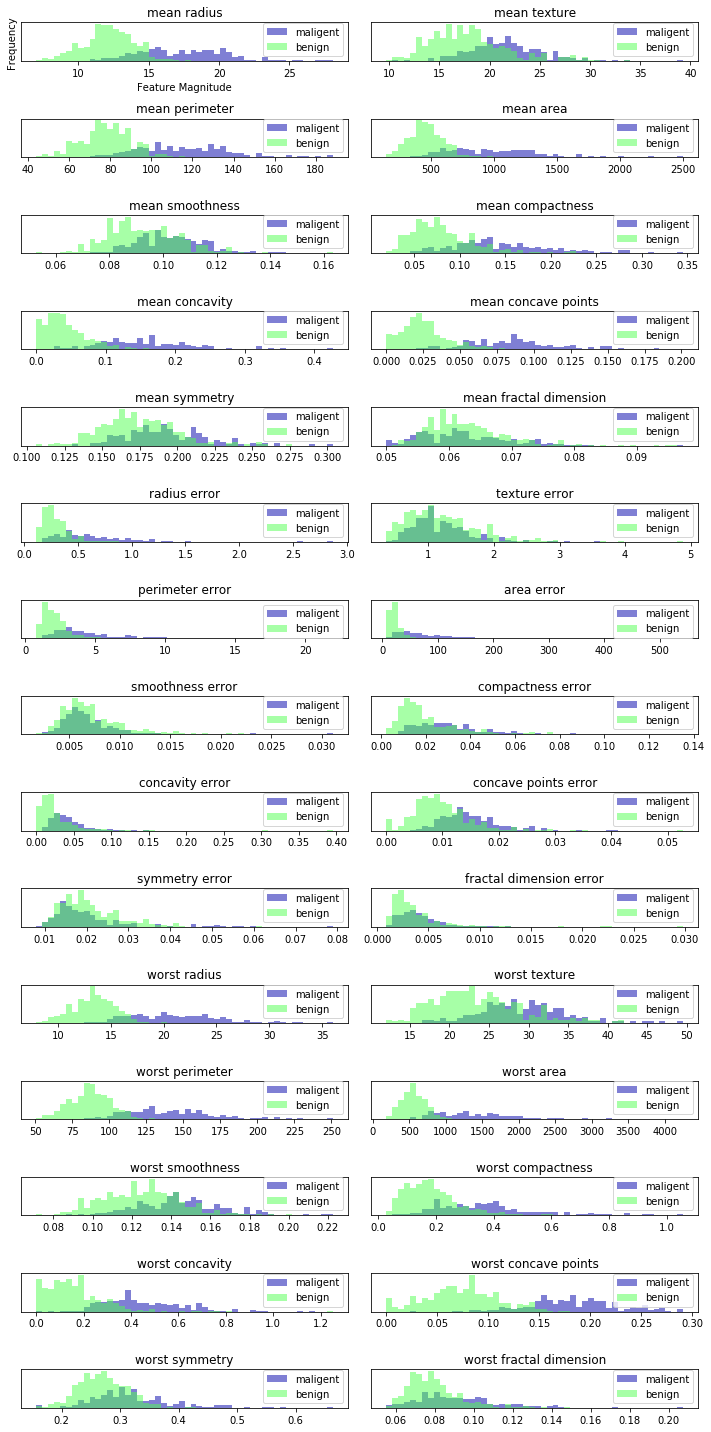

In [118]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].legend(["maligent", "benign"], loc="best")
ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Frequency")
fig.tight_layout()
    


In [121]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)